# Estimate attractor dimension given N dimensional time-series data

In [9]:
import os
import skdim
import numpy as np
import pandas as pd

import pyfilaments.analysisutils as analysis
from pyfilaments._def_analysis import *

import matplotlib.pyplot as plt

%matplotlib notebook

# Ground Truth datasets to test the Correlation dimension algorithm

In [104]:
#generate data : np.array (n_points x n_dim). Here a uniformly sampled 5-ball embedded in 10 dimensions
data = np.zeros((10000,10))
data[:,:3] = skdim.datasets.hyperBall(n = 10000, d = 3, radius = 1, random_state = 0)

#estimate global intrinsic dimension
danco = skdim.id.DANCo().fit(data)
#estimate local intrinsic dimension (dimension in k-nearest-neighborhoods around each point):
lpca = skdim.id.lPCA(ver = 'FO').fit_pw(data,
                              n_neighbors = 100,
                              n_jobs = 1)
                            
#get estimated intrinsic dimension
print(danco.dimension_, np.mean(lpca.dimension_pw_)) 

2.883328734122426 3.0


In [105]:
# Global correlation dimension

corr_dim = skdim.id.CorrInt().fit(data)

print(corr_dim.dimension_)

2.9330291542031164


In [106]:
# Local Correlation dimension

corr_dim = skdim.id.CorrInt().fit_pw(data, n_neighbors = 100, n_jobs = 1)

print(np.mean(corr_dim.dimension_pw_))


2.513466007502361


<IPython.core.display.Javascript object>


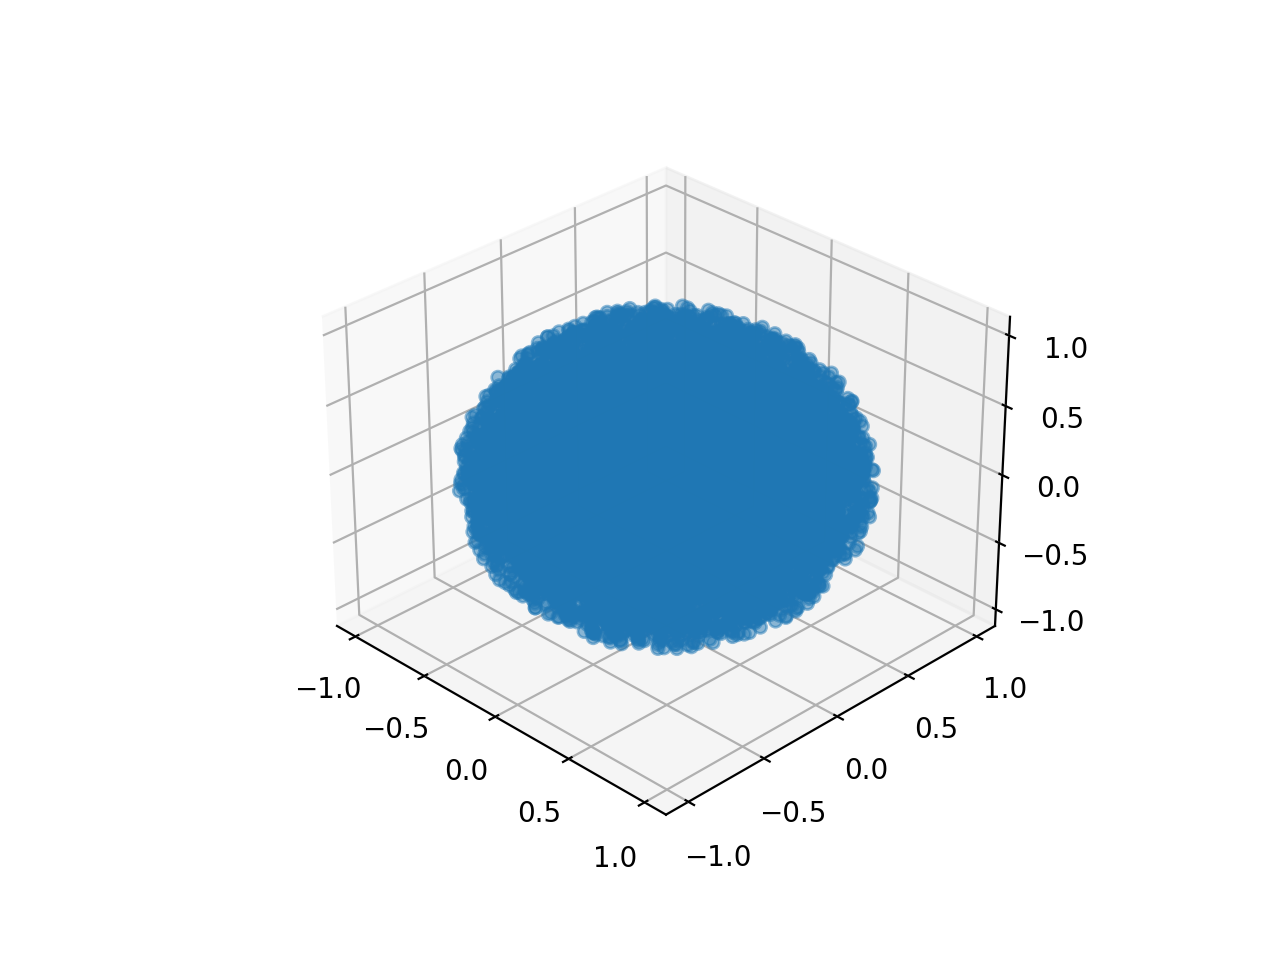

In [7]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib notebook

# 3D plot forma
elev = 30
azim = -45

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

x, y, z = data[:, 0], data[:, 1], data[:, 2]


ax.scatter(x, y, z, alpha = 0.5)


ax.view_init(elev= elev, azim = azim)

# Benchmark Manifolds

In [81]:
# Create benchmark manifold datasets
bm = skdim.datasets.BenchmarkManifolds()

bm_data = bm.generate()

In [83]:
np.shape(bm_data['M1_Sphere'])

(2500, 11)

In [88]:
bm.truth

,Intrinsic Dimension,Number of variables,Description
M1_Sphere,10,11,10D sphere linearly embedded
M2_Affine_3to5,3,5,Affine space
M3_Nonlinear_4to6,4,6,"Concentrated figure, mistakable with a 3D one"
M4_Nonlinear,4,8,Nonlinear manifold
M5a_Helix1d,1,3,1D helix
M5b_Helix2d,2,3,2D helix
M6_Nonlinear,6,36,Nonlinear manifold
M7_Roll,2,3,Swiss Roll
M8_Nonlinear,12,72,Nonlinear (highly curved) manifold
M9_Affine,20,20,Affine space


In [128]:
data = bm_data['M11_Moebius']

#estimate global intrinsic dimension
danco = skdim.id.DANCo().fit(data)
#estimate local intrinsic dimension (dimension in k-nearest-neighborhoods around each point):
lpca = skdim.id.lPCA(ver = 'FO').fit_pw(data,
                              n_neighbors = 100,
                              n_jobs = 1)
                            
#get estimated intrinsic dimension
print(danco.dimension_, np.mean(lpca.dimension_pw_)) 

# Global correlation dimension

corr_dim = skdim.id.CorrInt(k1=10, k2=20).fit(data)
print('Correlation dimension (global): ',corr_dim.dimension_)


corr_dim = skdim.id.CorrInt().fit_pw(data, n_neighbors = 100, n_jobs = 1)

print('Correlation dimension (point-wise): ', np.mean(corr_dim.dimension_pw_))

2.262019893103639 2.9912
Correlation dimension (global):  1.994221905220365
Correlation dimension (point-wise):  1.790393034894726


<IPython.core.display.Javascript object>


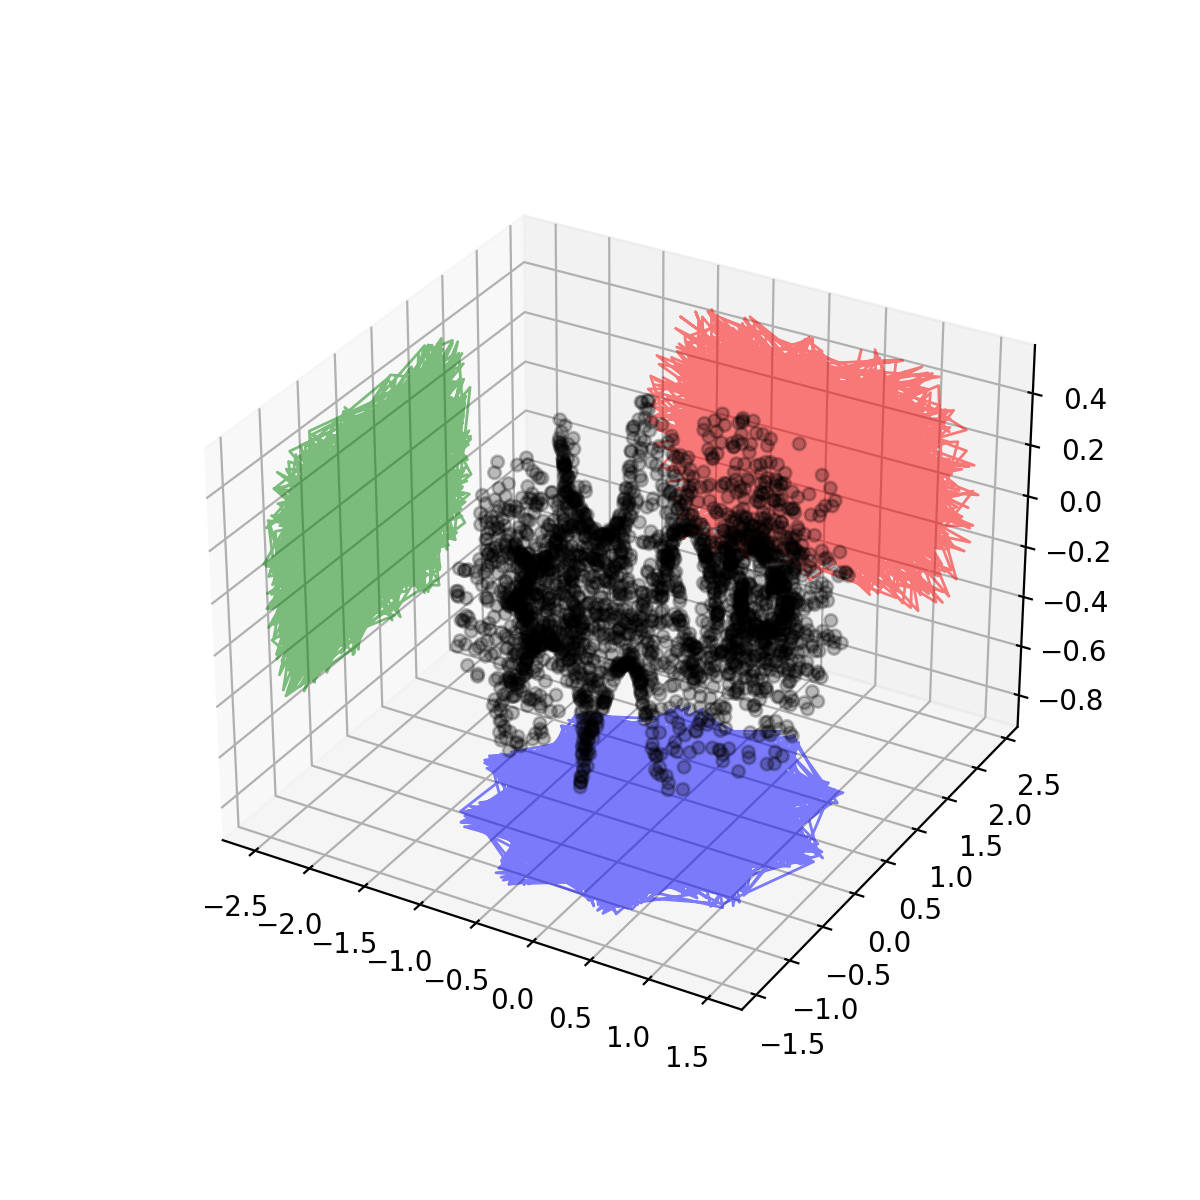

In [129]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  

# Plot the shape of the attractor
mode_1, mode_2, mode_3 = np.array(data[:,0]), np.array(data[:,1]), np.array(data[:,2])

Nt = len(mode_1)


%matplotlib notebook
plt.style.use('default')



x = mode_1
y = mode_2
z = mode_3

x_min, x_max = np.min(x), np.max(x)
y_min, y_max = np.min(y), np.max(y)
z_min, z_max = np.min(z), np.max(z)

x_extent, y_extent, z_extent = x_max - x_min, y_max - y_min, z_max - z_min

scale_factor = 0.35
x_min, x_max = x_min - scale_factor*x_extent, x_max + scale_factor*x_extent
y_min, y_max = y_min - scale_factor*y_extent, y_max + scale_factor*y_extent
z_min, z_max = z_min - scale_factor*z_extent, z_max + scale_factor*z_extent

# 3D plot formatting
elev = 30
azim = -45

fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(111, projection='3d')

ax.plot(x, z, 'r', zdir='y', zs= y_max, linewidth = 1, alpha = 0.5)
ax.plot(y, z, 'g', zdir='x', zs= x_min, linewidth = 1,  alpha = 0.5)
ax.plot(x, y, 'b', zdir='z', zs= z_min, linewidth = 1,  alpha = 0.5)

ax.scatter(x, y, z, color = 'k', alpha = 0.25)

# Estimate attractor dimension of filament dynamics

In [66]:
# Load a filament dataset

import pandas as pd

# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrengthSweep_widerICS_FINAL_2021-12-23/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.269_activityTime_750_simType_point/SimResults_00_.hdf5'

file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrengthSweep_widerICS_FINAL_2021-12-23/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.782_activityTime_750_simType_point/SimResults_00_.hdf5'

# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrengthSweep_widerICS_FINAL_2021-12-23/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_0.5_activityTime_750_simType_point/SimResults_00_.hdf5'


# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrengthSweeps_diffActivityTimeScales_FINAL/activityTime_750/SimData_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_0.5_activityTime_750_simType_point/sim_data_00_.hdf5'

# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrengthSweep_widerICS_FINAL_2021-12-23/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.077_activityTime_750_simType_point/SimResults_07_.hdf5'

# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrengthSweep_widerICS_FINAL_2021-12-23/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.141_activityTime_750_simType_point/SimResults_07_.hdf5'

fil = analysis.analysisTools(file = file)


shape_modes_file = os.path.join(fil.analysisFolder, fil.dataName[:-5]+'_ModeAmplitudes.csv')

if os.path.exists(shape_modes_file):
    df_shape_modes = pd.read_csv(shape_modes_file)

    df_shape_modes
else:
    print('Shape modes data not found!')




Attribute not found
**************************************************
Time-scales
**************************************************
Stretch relzation time: 0.43
Bend relaxation time: 228072.75
Active motility time-scale: 0.56
1
**************************************************
Dimensionless numbers
**************************************************
Force per unit lenth due to activity: 0.00456
Activity number: 95.90287
**************************************************


In [67]:
# Neglect transients

start_cycle = 100 # Number of cycles to ignore transients

start_time = start_cycle*fil.activity_timescale

start_index = next((i for i,x in enumerate(np.array(df_shape_modes['Time'])) if x>= start_time), 0)
                   
print(start_index)

df_shape_modes = df_shape_modes.drop(labels = range(0,start_index))

df_shape_modes

7500


,Unnamed: 0,Time,Mode 1 amplitude,Mode 2 amplitude,Mode 3 amplitude,Mode 4 amplitude,Mode 5 amplitude
7500,7500,75000.0,1.584430,0.832046,-0.298811,-0.222586,-0.558772
7501,7501,75010.0,1.545781,0.823926,-0.322479,-0.222370,-0.560673
7502,7502,75020.0,1.541362,0.813692,-0.343920,-0.227158,-0.540035
7503,7503,75030.0,1.553081,0.807998,-0.370941,-0.239377,-0.506366
7504,7504,75040.0,1.570850,0.805818,-0.410264,-0.263232,-0.462137
...,...,...,...,...,...,...,...
37496,37496,374960.0,-11.209358,-1.829109,-0.872745,-0.448124,-0.128004
37497,37497,374970.0,-11.185019,-1.997614,-0.766194,-0.365829,-0.000067
37498,37498,374980.0,-11.155665,-2.155285,-0.660849,-0.282779,0.134166
37499,37499,374990.0,-11.121402,-2.302683,-0.556797,-0.199406,0.273588


<IPython.core.display.Javascript object>


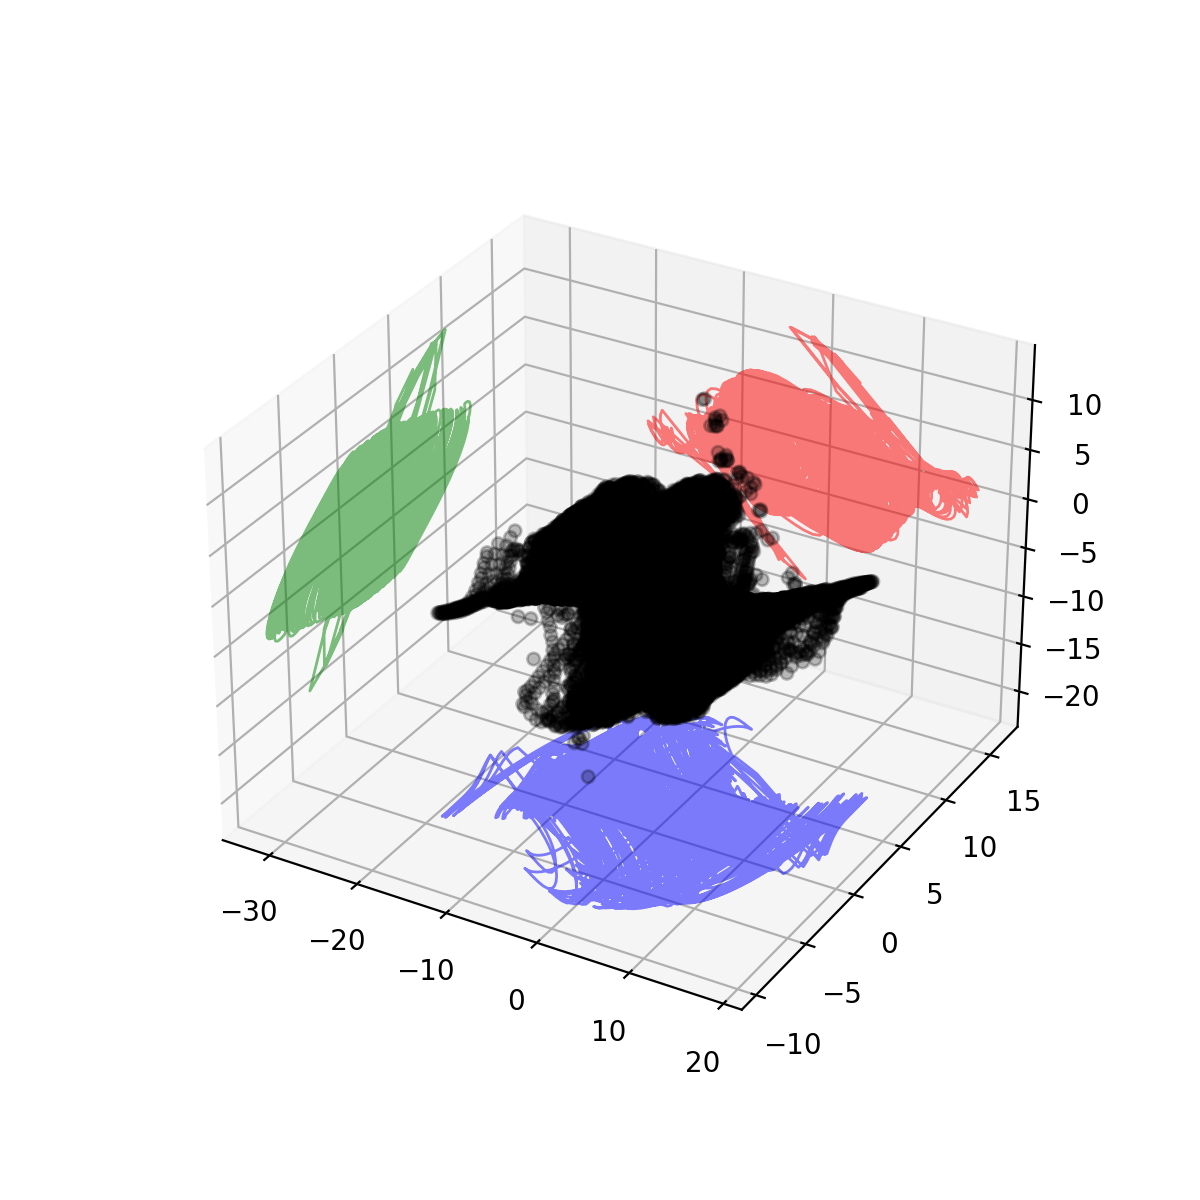

In [68]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  

# Plot the shape of the attractor
mode_1, mode_2, mode_3 = np.array(df_shape_modes['Mode 1 amplitude'][:]), np.array(df_shape_modes['Mode 2 amplitude'][:]), np.array(df_shape_modes['Mode 3 amplitude'][:])

Nt = len(mode_1)


%matplotlib notebook
plt.style.use('default')



x = mode_1
y = mode_2
z = mode_3

x_min, x_max = np.min(x), np.max(x)
y_min, y_max = np.min(y), np.max(y)
z_min, z_max = np.min(z), np.max(z)

x_extent, y_extent, z_extent = x_max - x_min, y_max - y_min, z_max - z_min

scale_factor = 0.35
x_min, x_max = x_min - scale_factor*x_extent, x_max + scale_factor*x_extent
y_min, y_max = y_min - scale_factor*y_extent, y_max + scale_factor*y_extent
z_min, z_max = z_min - scale_factor*z_extent, z_max + scale_factor*z_extent

# 3D plot formatting
elev = 30
azim = -45

fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(111, projection='3d')

ax.plot(x, z, 'r', zdir='y', zs= y_max, linewidth = 1, alpha = 0.5)
ax.plot(y, z, 'g', zdir='x', zs= x_min, linewidth = 1,  alpha = 0.5)
ax.plot(x, y, 'b', zdir='z', zs= z_min, linewidth = 1,  alpha = 0.5)

ax.scatter(x, y, z, color = 'k', alpha = 0.25)

<IPython.core.display.Javascript object>


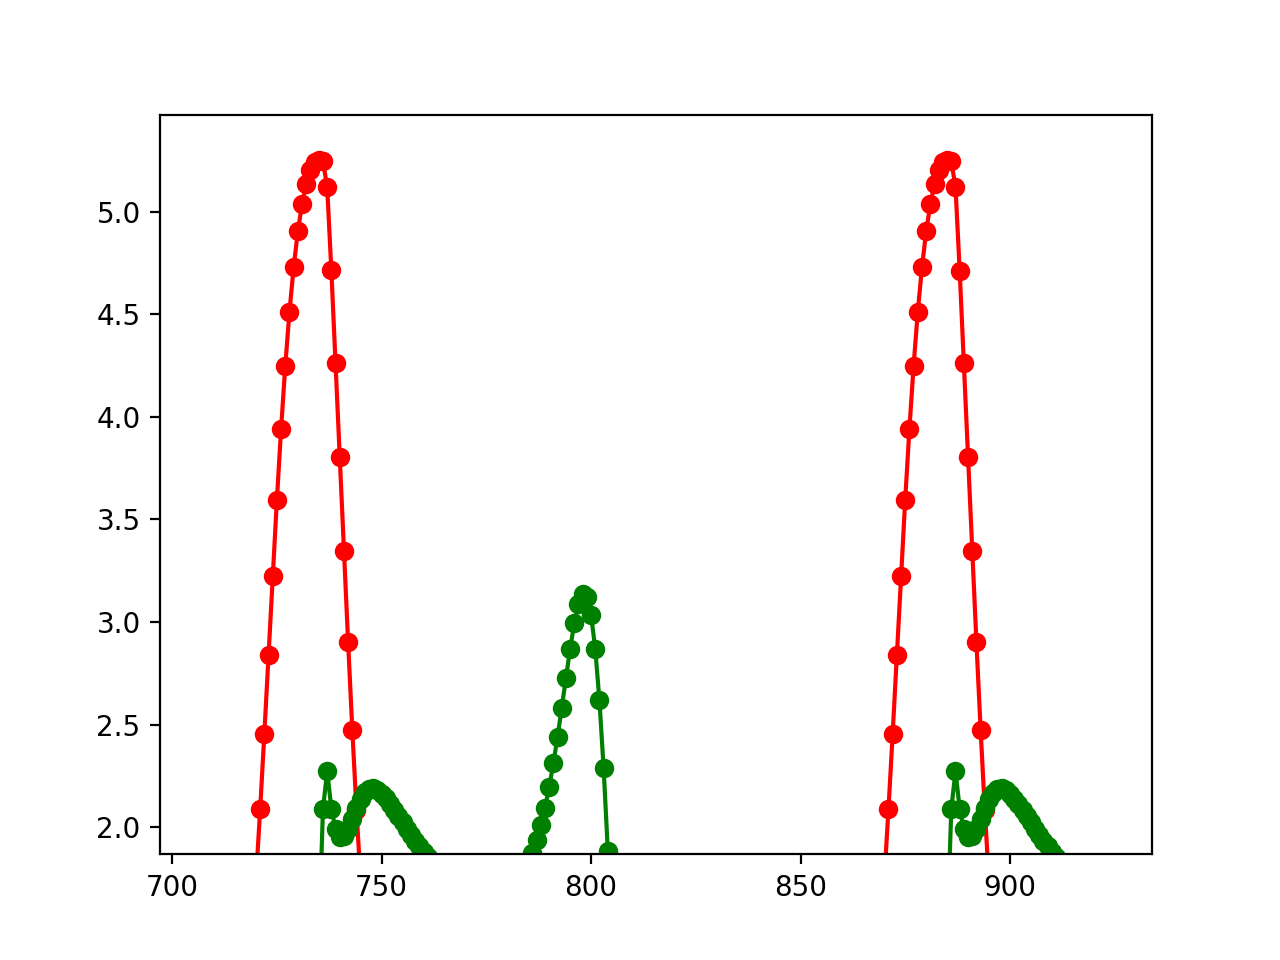

In [155]:
# Plot the individual mode amplitudes

plt.figure()

plt.plot(x[-1000:-1], color = 'r', marker = 'o')

plt.plot(y[-1000:-1], color = 'g', marker = 'o')

plt.plot(z[-1000:-1], color = 'b', marker = 'o')

plt.show()

In [69]:
array_len = len(df_shape_modes)

mode_amp_array = np.zeros((array_len,5))

mode_amp_array[:,0] = df_shape_modes['Mode 1 amplitude']
mode_amp_array[:,1] = df_shape_modes['Mode 2 amplitude']
mode_amp_array[:,2] = df_shape_modes['Mode 3 amplitude']
mode_amp_array[:,3] = df_shape_modes['Mode 4 amplitude']
mode_amp_array[:,4] = df_shape_modes['Mode 5 amplitude']



In [70]:
# Global dimension estimate
corr_dim = skdim.id.CorrInt().fit(mode_amp_array)
corr_dim.dimension_

2.0942436784619773

In [145]:
# Local dimension estimate

corr_dim = skdim.id.CorrInt(k1=10, k2=20).fit_pw(mode_amp_array, n_neighbors = 100, n_jobs = 1)
np.mean(corr_dim.dimension_pw_)

1.8337532115195967

In [146]:
#estimate local intrinsic dimension (dimension in k-nearest-neighborhoods around each point):
#estimate global intrinsic dimension

danco = skdim.id.DANCo().fit(mode_amp_array)
lpca = skdim.id.lPCA(ver = 'FO').fit_pw(mode_amp_array,
                              n_neighbors = 100,
                              n_jobs = 1)
                            
#get estimated intrinsic dimension
print(danco.dimension_, np.mean(lpca.dimension_pw_)) 

2.420244401985661 1.9068031065631146


In [151]:
np.shape(mode_amp_array)

(30001, 5)

# Attractor dimension estimate from filament time-series data

In [2]:
import nolds

In [4]:
from nolds import examples

<IPython.core.display.Javascript object>


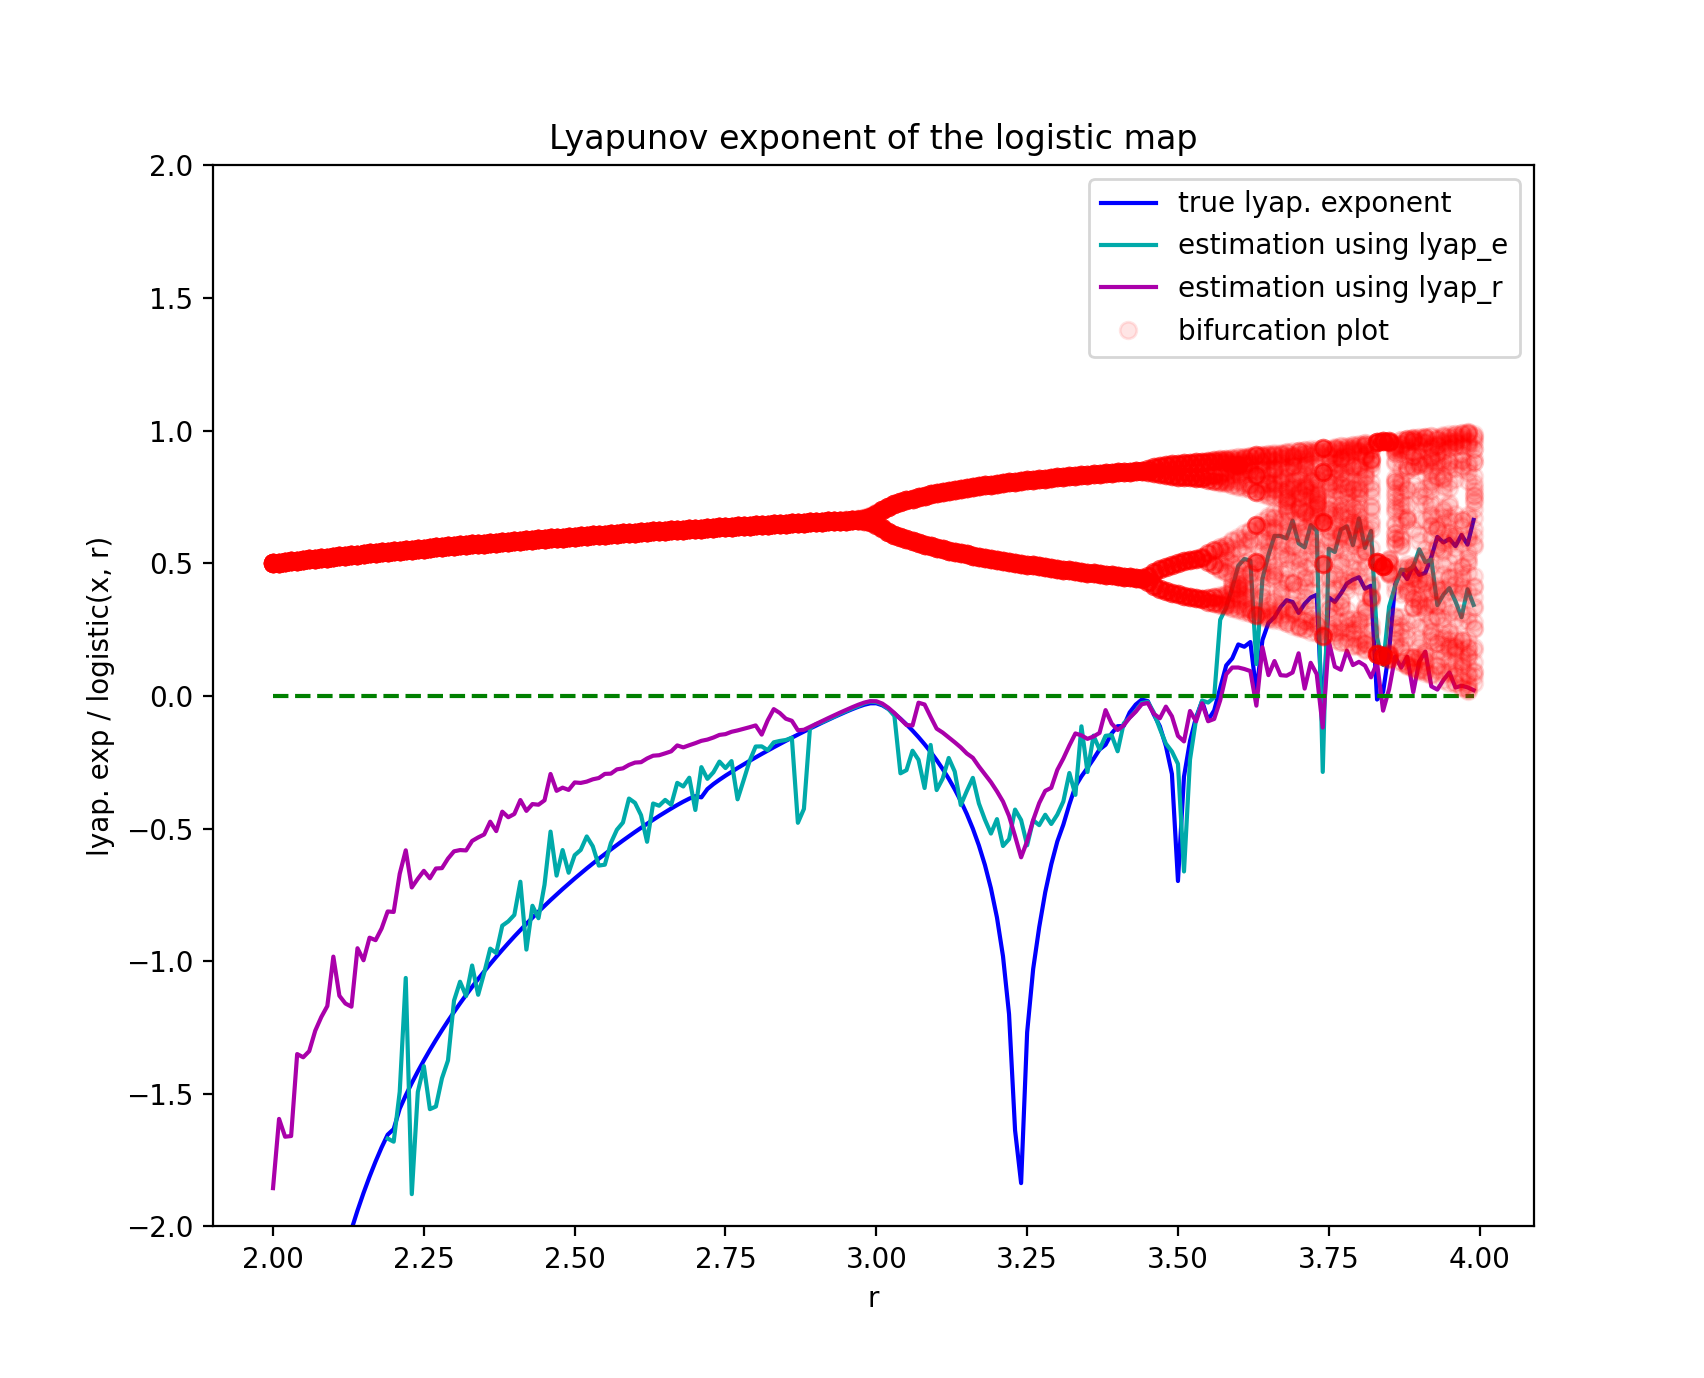

In [8]:
nolds.examples.plot_lyap(maptype=u'logistic')

In [154]:
# Load a filament data set and calculate an appropriate time-series

# file ='/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrengthSweep_widerICS_FINAL_2021-12-23/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.205_activityTime_750_simType_point/SimResults_00_.hdf5'
# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrengthSweep_widerICS_FINAL_2021-12-23/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.269_activityTime_750_simType_point/SimResults_00_.hdf5'

# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrengthSweep_widerICS_FINAL_2021-12-23/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.333_activityTime_750_simType_point/SimResults_00_.hdf5'

# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrengthSweep_widerICS_FINAL_2021-12-23/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.526_activityTime_750_simType_point/SimResults_00_.hdf5'

# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrengthSweep_widerICS_FINAL_2021-12-23/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.59_activityTime_750_simType_point/SimResults_00_.hdf5'

# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrengthSweep_widerICS_FINAL_2021-12-23/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.718_activityTime_750_simType_point/SimResults_00_.hdf5'

# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrengthSweep_widerICS_FINAL_2021-12-23/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.782_activityTime_750_simType_point/SimResults_00_.hdf5'

# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrengthSweep_widerICS_FINAL_2021-12-23/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.744_activityTime_750_simType_point/SimResults_01_.hdf5'


# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrengthSweep_widerICS_FINAL_2021-12-23/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_0.5_activityTime_750_simType_point/SimResults_00_.hdf5'

# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrengthSweeps_diffActivityTimeScales_FINAL/activityTime_750/SimData_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_0.5_activityTime_750_simType_point/sim_data_00_.hdf5'

# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrengthSweep_widerICS_FINAL_2021-12-23/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.077_activityTime_750_simType_point/SimResults_07_.hdf5'

# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrengthSweep_widerICS_FINAL_2021-12-23/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.141_activityTime_750_simType_point/SimResults_07_.hdf5'

file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrengthSweep_widerICS_FINAL_2021-12-23/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.487_activityTime_750_simType_point/SimResults_00_.hdf5'


fil = analysis.analysisTools(file = file)

Attribute not found
**************************************************
Time-scales
**************************************************
Stretch relzation time: 0.43
Bend relaxation time: 228072.75
Active motility time-scale: 0.4
1
**************************************************
Dimensionless numbers
**************************************************
Force per unit lenth due to activity: 0.00637
Activity number: 133.85005
**************************************************


In [155]:
fil.compute_base_tip_angle()

# Neglect trasients
start_cycle = 200 # Number of cycles to ignore transients

start_time = start_cycle*fil.activity_timescale

start_index = next((i for i,x in enumerate(np.array(fil.Time)) if x>= start_time), 0)
                   
print(start_index)

base_tip_array = fil.derived_data['base tip angle'][start_index:]
time_array = fil.Time[start_index:]


15000


<IPython.core.display.Javascript object>


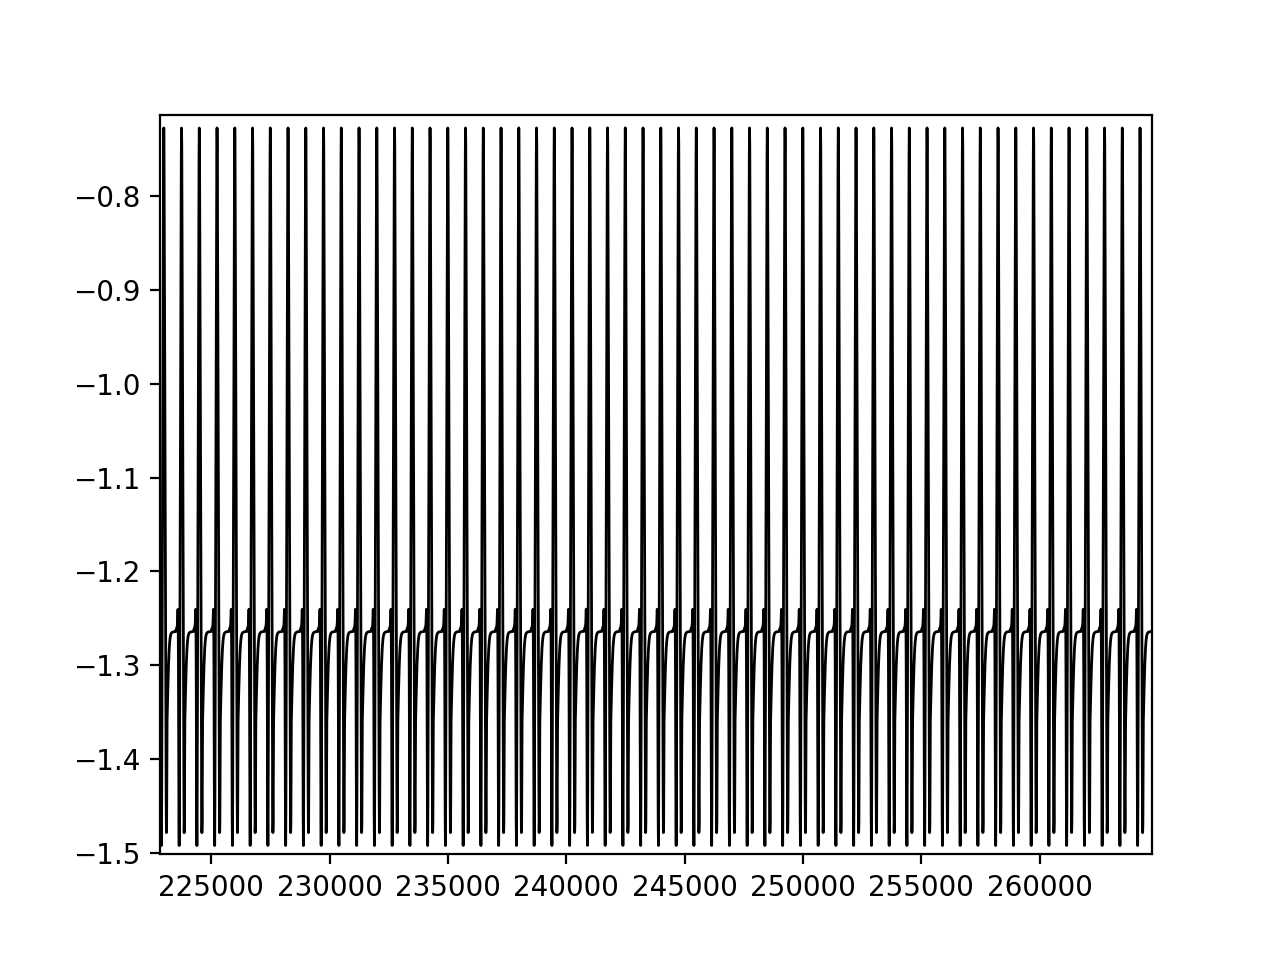

In [156]:
# Plot the time-series

plt.figure()

plt.plot(time_array, base_tip_array, linewidth = 1, color = 'k')

plt.show()

In [157]:
# calculate the correlation-dimension using nolds
corr_dim, (rval, csums, poly) = nolds.corr_dim(base_tip_array, 10, debug_plot = True, debug_data= True)

plt.show()

print(corr_dim)

0.42720832535560505


<IPython.core.display.Javascript object>


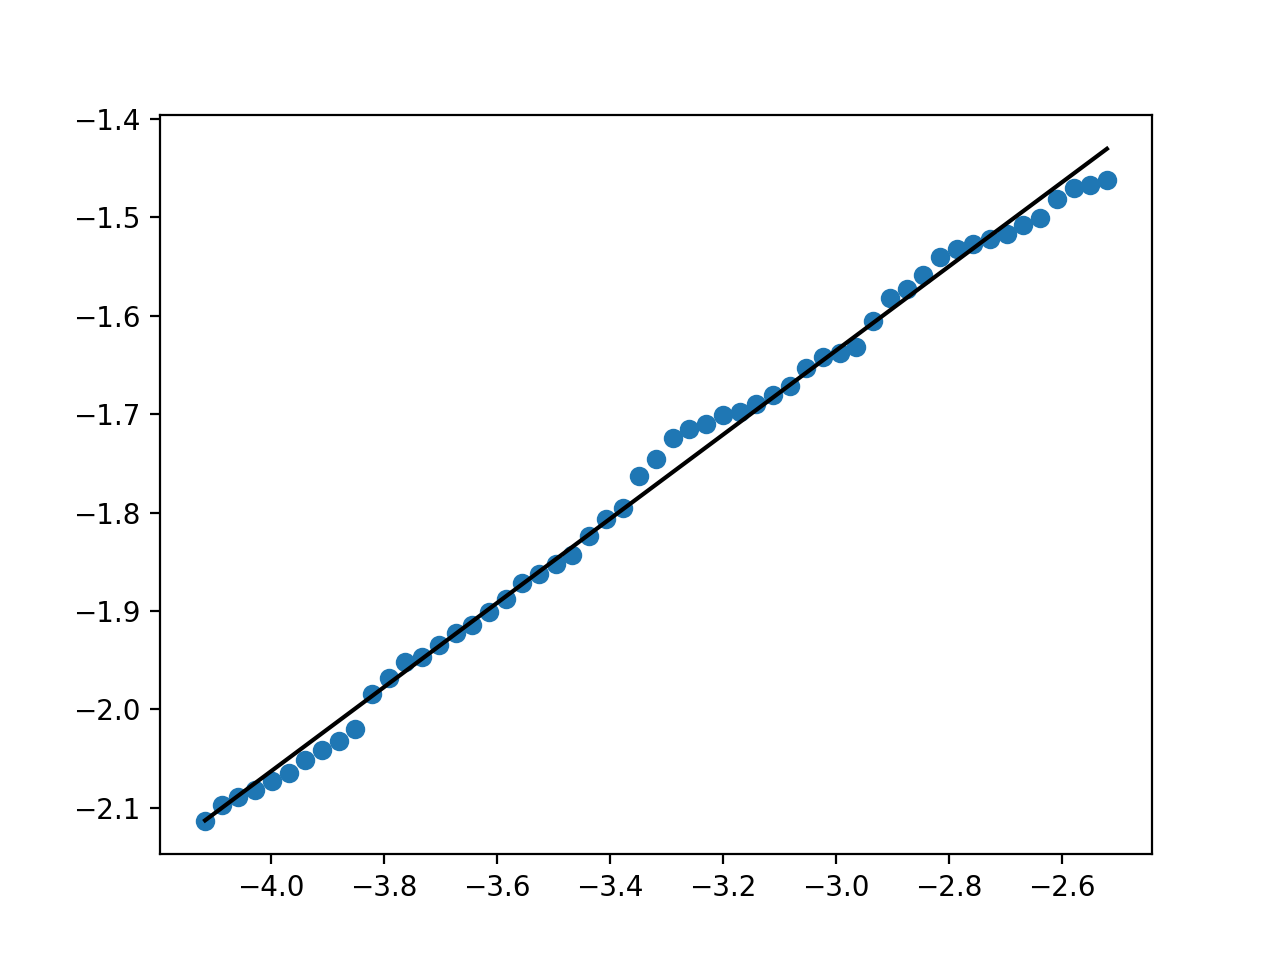

In [158]:
plt.figure()

x_array = np.linspace(min(rval), max(rval), 50)

fit_array = poly[0]*x_array + poly[1]

plt.scatter(rval, csums)

plt.plot(x_array, fit_array, 'k-')


plt.show()

In [81]:
poly

array([ 1.7391709 , -1.03943482])